In [1]:
# Importing the libraries
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv('sdata1.csv')
# sed 's/ /,/g' sdata.csv > sdata1.csv


In [2]:
df = df.rename(columns={'age_CE': 'Year'})

In [3]:
df = df[df['MDD'].notna()]
#df = df.replace("-", np.nan)

In [4]:
df['Date'] = pd.to_datetime(df['DOY'], format='%j').dt.strftime('%m-%d') # 04/02 format 
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d').dt.strftime('%b %d')
df.drop('MDD', axis=1)
df.describe()


,Year,MDD
count,785.000000,785.000000
mean,1548.961783,414.016561
std,301.343740,12.706899
min,812.000000,327.000000
25%,1344.000000,410.000000
50%,1583.000000,415.000000
75%,1798.000000,419.000000
max,2010.000000,508.000000


In [5]:
df.head(5)

,Year,DOY,MDD,Date
11,812,92,401.0,Apr 02
14,815,105,415.0,Apr 15
30,831,96,406.0,Apr 06
50,851,108,418.0,Apr 18
52,853,104,414.0,Apr 14


In [6]:
df = df.drop('MDD', axis=1)
#df = df.drop('DOY', axis=1)

In [7]:
df.head(5) 
df.dtypes

Year     int64
DOY     object
Date    object
dtype: object

In [8]:
df['DOY'] = df['DOY'].astype(str).astype(int)
df.dtypes

Year     int64
DOY      int64
Date    object
dtype: object

In [9]:
import plotly.express as px


fig = px.scatter(df, x='Date', y="Year")
fig.update_layout(yaxis_title="Year") 
fig.update_layout(xaxis_title="Date of Peak of Bloom") 
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tickangle=45) 
fig.show()
#fig.show("png")

In [10]:
df.head(4)
df.describe()

,Year,DOY
count,785.000000,785.000000
mean,1548.961783,104.694268
std,301.343740,6.456549
min,812.000000,86.000000
25%,1344.000000,100.000000
50%,1583.000000,105.000000
75%,1798.000000,109.000000
max,2010.000000,128.000000


In [11]:
#df.sort_values(by='DOY', ascending = True, inplace = True)
#df.sort_values(by='DOY', ascending = False, inplace = True)
df.sort_values(by=['DOY'], inplace = True)

In [12]:
df.tail(10)

,Year,DOY,Date
894,1695,120,Apr 30
462,1263,120,Apr 30
1011,1812,120,Apr 30
1038,1839,120,Apr 30
755,1556,120,Apr 30
954,1755,120,Apr 30
815,1616,122,May 02
739,1540,122,May 02
522,1323,124,May 04
725,1526,128,May 08


In [21]:
fig = px.scatter(df, x='Year', y="DOY")
fig.update_layout(xaxis_title="Year") 
fig.update_layout(yaxis_title="Day of Sakura Peak") 
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tickangle=45) 
fig.show()

In [14]:
#df['DOY'].plot(kind='kde')
#df['DOY'].plot(kind='hist', edgecolor='black')

In [15]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

x = df['DOY'].apply(np.array)
hist_data = [x]
group_labels = ['Sakura Data'] # name of the dataset

mean = np.mean(x)
stdev_pluss = np.std(x)
stdev_minus = np.std(x)*-1

fig = ff.create_distplot(hist_data, group_labels, curve_type='kde')

#for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
#    fig.update_layout(template=template, title="Mt Bruno Elevation: '%s' theme" % template)
#    fig.show()

fig.update_layout(template = 'simple_white')
fig.show()

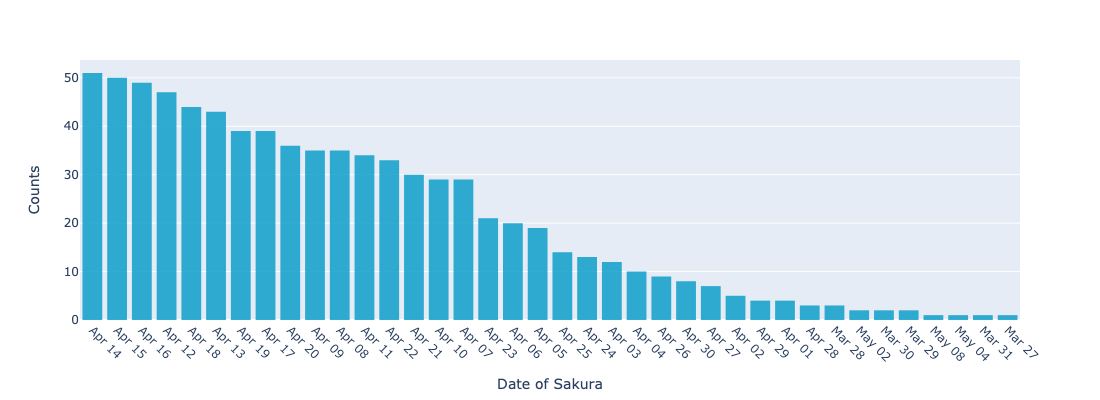

In [19]:
import plotly.express as px
# Import the necessaries libraries
#import plotly.offline as pyo
#import plotly.graph_objs as go
# Set notebook mode to work in offline
#pyo.init_notebook_mode()

import plotly.io as pio
pio.renderers.default='notebook'

import plotly.graph_objects as go

fig = px.histogram(df, x="Date",
                   opacity=0.8,width=1100, height=400,
                   color_discrete_sequence=['#0099C6']) 
fig.update_layout(yaxis_title="Counts") 
fig.update_layout(xaxis_title="Date of Sakura") 
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tickangle=45) 
fig.show("png")